## Regression with Categorical Outcome Variable: NBA Data Set

In [82]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [83]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [84]:
#Import Data
NBA = pd.read_csv("D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\PredictionModelsWithSportsData\\data\\NBA_Games2.csv")

In [85]:
#Explore the Dataset here
display(NBA[0:10])

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,WIN
0,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900072,2019-07-12,ATL @ SAS,W,201,80,27,79,0.342,9,32,0.281,17,20,0.850,13,23,36,14,15,3,12,24,8.0,1
1,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900060,2019-07-11,ATL @ WAS,L,200,71,26,68,0.382,12,29,0.414,7,10,0.700,9,28,37,19,10,8,22,25,-5.0,0
2,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900042,2019-07-09,ATL vs. IND,W,202,87,31,60,0.517,8,21,0.381,17,24,0.708,7,27,34,17,5,5,18,21,18.2,1
3,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900023,2019-07-07,ATL vs. MIN,L,178,60,18,62,0.290,4,22,0.182,20,32,0.625,9,27,36,7,7,10,18,28,-24.0,0
4,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22019,ATL,1521900013,2019-07-06,ATL @ MIL,L,201,83,25,73,0.342,10,32,0.313,23,26,0.885,9,30,39,13,11,6,13,21,2.0,0
5,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801220,2019-04-10,ATL vs. IND,L,240,134,43,103,0.417,17,41,0.415,31,38,0.816,22,39,61,29,5,7,17,25,-1.0,0
6,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801202,2019-04-07,ATL @ MIL,L,240,107,40,100,0.400,17,45,0.378,10,19,0.526,9,39,48,25,2,3,11,28,-8.0,0
7,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801181,2019-04-05,ATL @ ORL,L,240,113,41,94,0.436,10,39,0.256,21,31,0.677,10,28,38,21,16,4,14,21,-36.0,0
8,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801168,2019-04-03,ATL vs. PHI,W,240,130,48,92,0.522,12,36,0.333,22,28,0.786,11,33,44,29,7,7,11,26,8.0,1
9,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22018,ATL,21801162,2019-04-02,ATL @ SAS,L,240,111,43,94,0.457,12,34,0.353,13,20,0.650,11,32,43,26,13,2,11,18,-6.0,0


In [86]:
NBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18414 entries, 0 to 18413
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CITY               18414 non-null  object 
 1   TEAM_NAME          18414 non-null  object 
 2   TEAM_ID            18414 non-null  int64  
 3   NICKNAME           18414 non-null  object 
 4   STATE              18414 non-null  object 
 5   YEAR_FOUNDED       18414 non-null  int64  
 6   SEASON_ID          18414 non-null  int64  
 7   TEAM_ABBREVIATION  18414 non-null  object 
 8   GAME_ID            18414 non-null  int64  
 9   GAME_DATE          18414 non-null  object 
 10  MATCHUP            18414 non-null  object 
 11  WL                 18414 non-null  object 
 12  MIN                18414 non-null  int64  
 13  PTS                18414 non-null  int64  
 14  FGM                18414 non-null  int64  
 15  FGA                18414 non-null  int64  
 16  FG_PCT             184

In [87]:
pd.set_option('display.max_columns', None)

In [88]:
#Filter rows for 2017 NBA Season
NBA_2017 =  NBA[(NBA.SEASON_ID == 22017) & (NBA.GAME_ID < 1000000000)].copy()
display(NBA_2017[0:10])

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,WIN
101,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701214,2018-04-10,ATL vs. PHI,L,240,113,41,98,0.418,13,37,0.351,18,26,0.692,8,31,39,27,10,3,10,24,-8.0,0
102,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701202,2018-04-08,ATL @ BOS,W,239,112,43,86,0.500,15,35,0.429,11,14,0.786,5,32,37,23,7,4,13,19,6.0,1
103,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701184,2018-04-06,ATL @ WAS,W,239,103,38,79,0.481,11,33,0.333,16,23,0.696,7,43,50,24,5,5,18,22,6.0,1
104,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701172,2018-04-04,ATL vs. MIA,L,239,86,33,90,0.367,9,30,0.300,11,17,0.647,10,38,48,20,5,6,15,16,-29.0,0
105,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701158,2018-04-03,ATL @ MIA,L,240,98,37,88,0.420,13,33,0.394,11,15,0.733,12,37,49,24,10,1,15,15,-3.0,0
106,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701147,2018-04-01,ATL vs. ORL,W,241,94,41,85,0.482,11,36,0.306,1,1,1.000,5,47,52,33,0,3,14,15,6.0,1
107,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701130,2018-03-30,ATL vs. PHI,L,239,91,36,101,0.356,9,39,0.231,10,15,0.667,15,44,59,24,9,4,16,14,-10.0,0
108,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701120,2018-03-28,ATL @ MIN,L,239,114,41,77,0.532,13,27,0.481,19,23,0.826,4,33,37,26,10,2,19,22,-6.0,0
109,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701101,2018-03-25,ATL @ HOU,L,239,99,39,88,0.443,11,40,0.275,10,11,0.909,7,38,45,18,5,2,13,14,-19.0,0
110,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701087,2018-03-23,ATL @ GSW,L,241,94,37,84,0.440,11,32,0.344,9,20,0.450,5,39,44,24,5,5,11,14,-12.0,0


In [100]:
#Home dummy variable
NBA_2017['home'] = np.where(NBA_2017["MATCHUP"].str.contains("@"), 0, 1)

In [101]:
NBA_2017

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,WIN,home
101,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701214,2018-04-10,ATL vs. PHI,L,240,113,41,98,0.418,13,37,0.351,18,26,0.692,8,31,39,27,10,3,10,24,-8.0,0,1
102,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701202,2018-04-08,ATL @ BOS,W,239,112,43,86,0.500,15,35,0.429,11,14,0.786,5,32,37,23,7,4,13,19,6.0,1,0
103,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701184,2018-04-06,ATL @ WAS,W,239,103,38,79,0.481,11,33,0.333,16,23,0.696,7,43,50,24,5,5,18,22,6.0,1,0
104,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701172,2018-04-04,ATL vs. MIA,L,239,86,33,90,0.367,9,30,0.300,11,17,0.647,10,38,48,20,5,6,15,16,-29.0,0,1
105,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949,22017,ATL,21701158,2018-04-03,ATL @ MIA,L,240,98,37,88,0.420,13,33,0.394,11,15,0.733,12,37,49,24,10,1,15,15,-3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106,Charlotte,Charlotte Hornets,1610612766,Hornets,North Carolina,1988,22017,CHA,21700070,2017-10-27,CHA vs. HOU,L,242,93,33,88,0.375,11,29,0.379,16,28,0.571,11,33,44,16,6,5,9,14,-16.0,0,1
18107,Charlotte,Charlotte Hornets,1610612766,Hornets,North Carolina,1988,22017,CHA,21700055,2017-10-25,CHA vs. DEN,W,240,110,38,81,0.469,13,31,0.419,21,26,0.808,10,40,50,17,5,5,14,16,17.0,1,1
18108,Charlotte,Charlotte Hornets,1610612766,Hornets,North Carolina,1988,22017,CHA,21700044,2017-10-23,CHA @ MIL,L,240,94,33,78,0.423,7,26,0.269,21,36,0.583,10,38,48,17,3,5,14,21,-7.0,0,0
18109,Charlotte,Charlotte Hornets,1610612766,Hornets,North Carolina,1988,22017,CHA,21700017,2017-10-20,CHA vs. ATL,W,240,109,37,86,0.430,11,36,0.306,24,30,0.800,12,45,57,17,5,4,21,18,18.0,1,1


In [102]:
NBA_2017['PTS_A'] = NBA_2017['PTS'] - NBA_2017['PLUS_MINUS']

In [103]:
## Add Pythagorean Win-percent
#1) Sort the dataframe by game in order (i.e., gid)
NBA_2017 = NBA_2017.sort_values(by ='GAME_ID')

#2) Calculate cumulative GF and GA for each team
NBA_2017['cumPF'] = NBA_2017.groupby(['TEAM_ID'])['PTS'].apply(lambda x: x.cumsum())
NBA_2017['cumPA'] = NBA_2017.groupby(['TEAM_ID'])['PTS_A'].apply(lambda x: x.cumsum())

display(NBA_2017)

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,WIN,home,PTS_A,cumPF,cumPA
1501,Cleveland,Cleveland Cavaliers,1610612739,Cavaliers,Ohio,1970,22017,CLE,21700001,2017-10-17,CLE vs. BOS,W,239,102,38,83,0.458,5,22,0.227,21,25,0.840,9,41,50,19,3,4,17,25,3.0,1,1,99.0,102,99.0
846,Boston,Boston Celtics,1610612738,Celtics,Massachusetts,1946,22017,BOS,21700001,2017-10-17,BOS @ CLE,L,241,99,36,88,0.409,8,32,0.250,19,25,0.760,9,37,46,24,11,4,10,24,-3.0,0,0,102.0,99,102.0
5328,Houston,Houston Rockets,1610612745,Rockets,Texas,1967,22017,HOU,21700002,2017-10-17,HOU @ GSW,W,239,122,47,97,0.485,15,41,0.366,13,19,0.684,10,33,43,28,9,5,12,16,1.0,1,0,121.0,122,121.0
4630,Golden State,Golden State Warriors,1610612744,Warriors,California,1946,22017,GSW,21700002,2017-10-17,GSW vs. HOU,L,241,121,43,80,0.538,16,30,0.533,19,21,0.905,6,35,41,34,5,9,17,25,-1.0,0,1,122.0,121,122.0
18110,Charlotte,Charlotte Hornets,1610612766,Hornets,North Carolina,1988,22017,CHA,21700003,2017-10-18,CHA @ DET,L,238,90,29,73,0.397,9,30,0.300,23,29,0.793,3,44,47,16,4,3,17,15,-12.0,0,0,102.0,90,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6137,Los Angeles,Los Angeles Lakers,1610612747,Lakers,California,1948,22017,LAL,21701228,2018-04-11,LAL @ LAC,W,240,115,42,88,0.477,17,39,0.436,14,16,0.875,10,39,49,25,8,6,17,23,15.0,1,0,100.0,8862,8989.0
12322,Portland,Portland Trail Blazers,1610612757,Trail Blazers,Oregon,1970,22017,POR,21701229,2018-04-11,POR vs. UTA,W,240,102,41,89,0.461,9,24,0.375,11,16,0.688,7,39,46,19,9,9,10,22,9.0,1,1,93.0,8661,8445.0
15555,Utah,Utah Jazz,1610612762,Jazz,Utah,1974,22017,UTA,21701229,2018-04-11,UTA @ POR,L,241,93,33,89,0.371,8,23,0.348,19,24,0.792,14,39,53,18,5,7,14,19,-9.0,0,0,102.0,8540,8179.0
5247,Houston,Houston Rockets,1610612745,Rockets,Texas,1967,22017,HOU,21701230,2018-04-11,HOU @ SAC,L,241,83,31,82,0.378,13,46,0.283,8,12,0.667,8,32,40,11,2,6,14,24,-13.0,0,0,96.0,9213,8520.0


In [105]:
#Create Pythagorean win-percent
NBA_2017['pyth_wpct'] = NBA_2017['cumPF']**2/(NBA_2017['cumPF']**2 + NBA_2017['cumPA']**2)

display(NBA_2017[0:10])

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,WIN,home,PTS_A,cumPF,cumPA,pyth_wpct
1501,Cleveland,Cleveland Cavaliers,1610612739,Cavaliers,Ohio,1970,22017,CLE,21700001,2017-10-17,CLE vs. BOS,W,239,102,38,83,0.458,5,22,0.227,21,25,0.840,9,41,50,19,3,4,17,25,3.0,1,1,99.0,102,99.0,0.514922
846,Boston,Boston Celtics,1610612738,Celtics,Massachusetts,1946,22017,BOS,21700001,2017-10-17,BOS @ CLE,L,241,99,36,88,0.409,8,32,0.250,19,25,0.760,9,37,46,24,11,4,10,24,-3.0,0,0,102.0,99,102.0,0.485078
5328,Houston,Houston Rockets,1610612745,Rockets,Texas,1967,22017,HOU,21700002,2017-10-17,HOU @ GSW,W,239,122,47,97,0.485,15,41,0.366,13,19,0.684,10,33,43,28,9,5,12,16,1.0,1,0,121.0,122,121.0,0.504115
4630,Golden State,Golden State Warriors,1610612744,Warriors,California,1946,22017,GSW,21700002,2017-10-17,GSW vs. HOU,L,241,121,43,80,0.538,16,30,0.533,19,21,0.905,6,35,41,34,5,9,17,25,-1.0,0,1,122.0,121,122.0,0.495885
18110,Charlotte,Charlotte Hornets,1610612766,Hornets,North Carolina,1988,22017,CHA,21700003,2017-10-18,CHA @ DET,L,238,90,29,73,0.397,9,30,0.300,23,29,0.793,3,44,47,16,4,3,17,15,-12.0,0,0,102.0,90,102.0,0.437743
17522,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700003,2017-10-18,DET vs. CHA,W,239,102,41,96,0.427,9,26,0.346,11,12,0.917,9,38,47,24,14,3,8,21,12.0,1,1,90.0,102,90.0,0.562257
10535,Indiana,Indiana Pacers,1610612754,Pacers,Indiana,1976,22017,IND,21700004,2017-10-18,IND vs. BKN,W,240,140,53,102,0.520,9,34,0.265,25,32,0.781,14,33,47,29,12,9,14,25,9.0,1,1,131.0,140,131.0,0.533174
8731,Brooklyn,Brooklyn Nets,1610612751,Nets,New York,1976,22017,BKN,21700004,2017-10-18,BKN @ IND,L,241,131,45,94,0.479,12,30,0.400,29,32,0.906,11,32,43,22,7,2,20,25,-9.0,0,0,140.0,131,140.0,0.466826
6826,Miami,Miami Heat,1610612748,Heat,Florida,1988,22017,MIA,21700005,2017-10-18,MIA @ ORL,L,240,109,44,101,0.436,8,30,0.267,13,17,0.765,11,33,44,27,6,4,13,20,-7.0,0,0,116.0,109,116.0,0.468919
9946,Orlando,Orlando Magic,1610612753,Magic,Florida,1989,22017,ORL,21700005,2017-10-18,ORL vs. MIA,W,240,116,43,90,0.478,8,21,0.381,22,29,0.759,11,39,50,22,8,9,14,18,7.0,1,1,109.0,116,109.0,0.531081


In [106]:
###Run LPM
reg1 = smf.ols(formula = 'WIN ~ pyth_wpct', data = NBA_2017).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    WIN   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     268.7
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           2.65e-57
Time:                        16:43:22   Log-Likelihood:                -1598.5
No. Observations:                2378   AIC:                             3201.
Df Residuals:                    2376   BIC:                             3213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6461      0.192    -13.772      0.0

Text(0.5, 1.0, 'Pythagorean Win % and Win-Record')

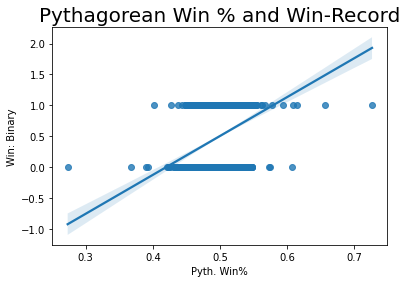

In [108]:
# Plot the model to articulate issues with LPM
## Create a scatter plot to explore the relationship between IV (i.e., pyth_wpct) and DV (Win)
import seaborn as sns
sns.regplot(x = 'pyth_wpct', y ='WIN', data = NBA_2017)
plt.xlabel('Pyth. Win%')
plt.ylabel('Win: Binary')
plt.title("Pythagorean Win % and Win-Record", fontsize=20)

In [109]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [110]:
Win_Pyth = 'WIN~pyth_wpct'
model = smf.glm(formula = Win_Pyth, data = NBA_2017, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    WIN   No. Observations:                 2378
Model:                            GLM   Df Residuals:                     2376
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1513.6
Date:                Mon, 21 Nov 2022   Deviance:                       3027.3
Time:                        16:45:18   Pearson chi2:                 2.41e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1071
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2824      1.027    -14.877      0.0

In [111]:
print("Coefficients")
print(result.params)
print("p-Values")
print(result.pvalues)
print("Dependent variables")
print(result.model.endog_names)

Coefficients
Intercept   -15.282377
pyth_wpct    30.573898
dtype: float64
p-Values
Intercept    4.653314e-50
pyth_wpct    3.747873e-50
dtype: float64
Dependent variables
WIN


In [112]:
fittedProbs = result.predict()
print(fittedProbs[0:10])

[0.61320335 0.38896784 0.53255106 0.46972606 0.13023744 0.87079493
 0.73474326 0.2670428  0.27975124 0.72208759]


In [113]:
# Based on the fitted probabilites of winning, here we create a binary winning variable for 1 indicating Win (Prob. > 50%), 0 indicating lose (Prob. < 50%)
fittedWin = [1 if x > .5 else 0 for x in fittedProbs]
print(fittedWin[0:10])

[1, 0, 1, 0, 0, 1, 1, 0, 0, 1]


In [114]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(NBA_2017['WIN'], fittedWin)

array([[742, 448],
       [389, 799]], dtype=int64)

In [115]:
# Success rate
(742+799)/(448+742+389+799)

0.6480235492010092

In [117]:
Win_Pyth2 = 'WIN~pyth_wpct + home'

model2 = smf.glm(formula = Win_Pyth2, data = NBA_2017, family=sm.families.Binomial())
result2 = model2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    WIN   No. Observations:                 2378
Model:                            GLM   Df Residuals:                     2375
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1481.6
Date:                Mon, 21 Nov 2022   Deviance:                       2963.2
Time:                        16:50:54   Pearson chi2:                 2.41e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1308
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.9054      1.049    -15.160      0.0

In [118]:
print("Coefficients")
print(result2.params)
print("p-Values")
print(result2.pvalues)
print("Dependent variables")
print(result2.model.endog_names)

Coefficients
Intercept   -15.905353
pyth_wpct    31.119647
home          0.700551
dtype: float64
p-Values
Intercept    6.514179e-52
pyth_wpct    3.003712e-50
home         2.156804e-15
dtype: float64
Dependent variables
WIN


In [119]:
fittedProbs2 = result2.predict()
print(fittedProbs2[0:10])

[0.69410681 0.30791206 0.44584633 0.55649738 0.09254577 0.90824823
 0.80017304 0.20134888 0.21202528 0.78955607]


In [120]:
# Based on the fitted probabilites of winning, here we create a binary winning variable for 1 indicating Win (Prob. > 50%), 0 indicating lose (Prob. < 50%)
fittedWin2 = [1 if x > .5 else 0 for x in fittedProbs2]
print(fittedWin2[0:10])

[1, 0, 0, 1, 0, 1, 1, 0, 0, 1]


In [121]:
confusion_matrix(NBA_2017['WIN'], fittedWin2)

array([[787, 403],
       [423, 765]], dtype=int64)

In [122]:
# Success rate
(787+765)/(403+787+423+765)

0.6526492851135408

In [123]:
NBA_2017_First = NBA_2017[NBA_2017['GAME_ID'] <= 21700615]
NBA_2017_Second = NBA_2017[NBA_2017['GAME_ID'] > 21700615]


In [124]:
nba2017_pre = NBA_2017_First.groupby(['TEAM_ABBREVIATION'])['WIN','PTS','PTS_A'].sum()
display(nba2017_pre[0:9])

C:\Users\mgy0003\AppData\Local\Temp\ipykernel_15848\670075019.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nba2017_pre = NBA_2017_First.groupby(['TEAM_ABBREVIATION'])['WIN','PTS','PTS_A'].sum()


,WIN,PTS,PTS_A
TEAM_ABBREVIATION,,,
ATL,11,4262,4443.6
BKN,15,4342,4473.6
BOS,34,4532,4299.8
CHA,15,4102,4140.0
CHI,15,4295,4551.0
CLE,26,4506,4460.0
DAL,15,4410,4490.0
DEN,21,4400,4355.2
DET,22,4088,4052.0


In [126]:
# Obtain the number of games played by each team for the 1st half of the 2016 regular season
NBA_First_GameNum = NBA_2017_First.groupby(['TEAM_ABBREVIATION']).size().reset_index(name='game_count')
display(NBA_First_GameNum[0:3])

,TEAM_ABBREVIATION,game_count
0,ATL,41
1,BKN,41
2,BOS,44


In [127]:
# Merge total number of games (i.e., NNL_pre_gameNUM) to the dataset
nba2017_pre=pd.merge(nba2017_pre, NBA_First_GameNum, on=['TEAM_ABBREVIATION'])
nba2017_pre.head()

,TEAM_ABBREVIATION,WIN,PTS,PTS_A,game_count
0,ATL,11,4262,4443.6,41
1,BKN,15,4342,4473.6,41
2,BOS,34,4532,4299.8,44
3,CHA,15,4102,4140.0,39
4,CHI,15,4295,4551.0,42


In [128]:
nba2017_pre['win_pct_pre']=nba2017_pre['WIN']/nba2017_pre['game_count']
nba2017_pre['pyth_wpct_pre']=nba2017_pre['PTS']**2/(nba2017_pre['PTS']**2+nba2017_pre['PTS_A']**2)

nba2017_pre.head()

,TEAM_ABBREVIATION,WIN,PTS,PTS_A,game_count,win_pct_pre,pyth_wpct_pre
0,ATL,11,4262,4443.6,41,0.268293,0.479149
1,BKN,15,4342,4473.6,41,0.365854,0.485075
2,BOS,34,4532,4299.8,44,0.772727,0.526273
3,CHA,15,4102,4140.0,39,0.384615,0.495390
4,CHI,15,4295,4551.0,42,0.357143,0.471085


In [137]:
nba2017_pre.corr()

,WIN,PTS,PTS_A,game_count,win_pct_pre,pyth_wpct_pre
WIN,1.000000,0.617275,-0.220696,0.297715,0.994729,0.899399
PTS,0.617275,1.000000,0.542081,0.511520,0.588240,0.620591
PTS_A,-0.220696,0.542081,1.000000,0.484101,-0.268640,-0.321535
game_count,0.297715,0.511520,0.484101,1.000000,0.203000,0.127226
win_pct_pre,0.994729,0.588240,-0.268640,0.203000,1.000000,0.911665
pyth_wpct_pre,0.899399,0.620591,-0.321535,0.127226,0.911665,1.000000


In [129]:
# 1. generate a team level data which obtain the total number of 1) wins, 2) goals for, and 3) goals against
nba2017_post = NBA_2017_Second.groupby(['TEAM_ABBREVIATION'])['WIN'].sum()
display(nba2017_post[0:9])

TEAM_ABBREVIATION
ATL    13
BKN    13
BOS    21
CHA    21
CHI    12
CLE    24
DAL     9
DEN    25
DET    17
Name: WIN, dtype: int64

In [130]:
# 2. obtain the number of games played by each team for the 2st half of the 2016 regular season
NBA_Second_GameNum = NBA_2017_Second.groupby(['TEAM_ABBREVIATION']).size().reset_index(name='game_count')
display(NBA_Second_GameNum[0:3])

,TEAM_ABBREVIATION,game_count
0,ATL,41
1,BKN,41
2,BOS,38


In [131]:
# Merge "NHL_pos_gameNum" to the "nhl2016_pos" dataset
nba2017_post=pd.merge(nba2017_post, NBA_Second_GameNum, on=['TEAM_ABBREVIATION'])
nba2017_post.head()

,TEAM_ABBREVIATION,WIN,game_count
0,ATL,13,41
1,BKN,13,41
2,BOS,21,38
3,CHA,21,43
4,CHI,12,40


In [132]:
nba2017_post['win_pct_post']=nba2017_post['WIN']/nba2017_post['game_count']
nba2017_post

,TEAM_ABBREVIATION,WIN,game_count,win_pct_post
0,ATL,13,41,0.317073
1,BKN,13,41,0.317073
2,BOS,21,38,0.552632
3,CHA,21,43,0.488372
4,CHI,12,40,0.300000
5,CLE,24,41,0.585366
6,DAL,9,39,0.230769
7,DEN,25,41,0.609756
8,DET,17,42,0.404762
9,GSW,25,40,0.625000


In [133]:
nba2017=pd.merge(nba2017_post, nba2017_pre, on=['TEAM_ABBREVIATION'])
nba2017.head()

,TEAM_ABBREVIATION,WIN_x,game_count_x,win_pct_post,WIN_y,PTS,PTS_A,game_count_y,win_pct_pre,pyth_wpct_pre
0,ATL,13,41,0.317073,11,4262,4443.6,41,0.268293,0.479149
1,BKN,13,41,0.317073,15,4342,4473.6,41,0.365854,0.485075
2,BOS,21,38,0.552632,34,4532,4299.8,44,0.772727,0.526273
3,CHA,21,43,0.488372,15,4102,4140.0,39,0.384615,0.495390
4,CHI,12,40,0.300000,15,4295,4551.0,42,0.357143,0.471085


In [134]:
WinPct_lm = smf.ols(formula = 'win_pct_post ~ win_pct_pre', data=nba2017).fit()
WinPct_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           win_pct_post   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     15.40
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           0.000541
Time:                        17:12:36   Log-Likelihood:                 14.429
No. Observations:                  29   AIC:                            -24.86
Df Residuals:                      27   BIC:                            -22.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1191      0.100      1.186      0.246      -0.087       0.325
win_pct_pre     0.7558      0.193      3.924      0.001       0.361       1.151
==============================================================================
Omnibus:                        0.868   Durbin-Watson:                   2.659
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.904
Skew:                           0.316   Prob(JB):                        0.637
Kurtosis:                       2.409   Cond. No.                         8.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
PythPct_lm = smf.ols(formula = 'win_pct_post ~ pyth_wpct_pre', data=nba2017).fit()
PythPct_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           win_pct_post   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     23.86
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           4.15e-05
Time:                        17:14:03   Log-Likelihood:                 17.068
No. Observations:                  29   AIC:                            -30.14
Df Residuals:                      27   BIC:                            -27.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.6293      0.641     -4.105      0.000      -3.944      -1.315
pyth_wpct_pre     6.2544      1.280      4.885      0.000       3.627       8.881
==============================================================================
Omnibus:                        1.068   Durbin-Watson:                   2.695
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.898
Skew:                           0.166   Prob(JB):                        0.638
Kurtosis:                       2.204   Cond. No.                         61.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}"}
Header = ['1','2']
Table_1 = summary_col([WinPct_lm, PythPct_lm,],\
                      regressor_order=['Intercept','Win%','Pyth.Win%'], model_names = Header, info_dict=info_dict)
print(Table_1)


                  1        2    
--------------------------------
Intercept      0.1191   -2.6293 
               (0.1004) (0.6405)
pyth_wpct_pre           6.2544  
                        (1.2804)
win_pct_pre    0.7558           
               (0.1926)         
R-squared      0.3632   0.4692  
R-squared Adj. 0.3396   0.4495  
R-squared      0.36     0.47    
Standard errors in parentheses.
